In [ ]:
!git clone https://github.com/VishaalVenkatesh/datasets.git


Cloning into 'datasets'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (51/51), done.


In [ ]:
!pip install importlib_resources

In [ ]:
import os
os.chdir('datasets')

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import IPython.display as display

In [5]:
df = tfds.load('covid_cxr')

Shuffling and writing examples to /root/tensorflow_datasets/covid_cxr/0.1.0.incompleteYGYNDA/covid_cxr-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/covid_cxr/0.1.0.incompleteYGYNDA/covid_cxr-test.tfrecord


Dataset covid_cxr downloaded and prepared to /root/tensorflow_datasets/covid_cxr/0.1.0. Subsequent calls will reuse this data.


In [10]:
#to print bytes as in tfrecord
raw_dataset = tf.data.TFRecordDataset('/root/tensorflow_datasets/covid_cxr/0.1.0/covid_cxr-test.tfrecord-00002-of-00008')
for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    #print(example)

In [12]:
'''
    To print actual images with label
'''
# to read TFRecord file use TFRecordDataset
raw_image_dataset = tf.data.TFRecordDataset('/root/tensorflow_datasets/covid_cxr/0.1.0/covid_cxr-test.tfrecord-00002-of-00008')

# Create a dictionary describing the features.
image_feature_description = {
    "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
    "label": tf.io.FixedLenFeature([], tf.int64),  # shape [] means single element
    }

# create a function to apply image feature description to each observation
def _parse_image_function(example_proto):
  # parse the input tf.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

# use map to apply this operation to each element of dataset
parsed_image_dataset = raw_image_dataset.map(_parse_image_function)

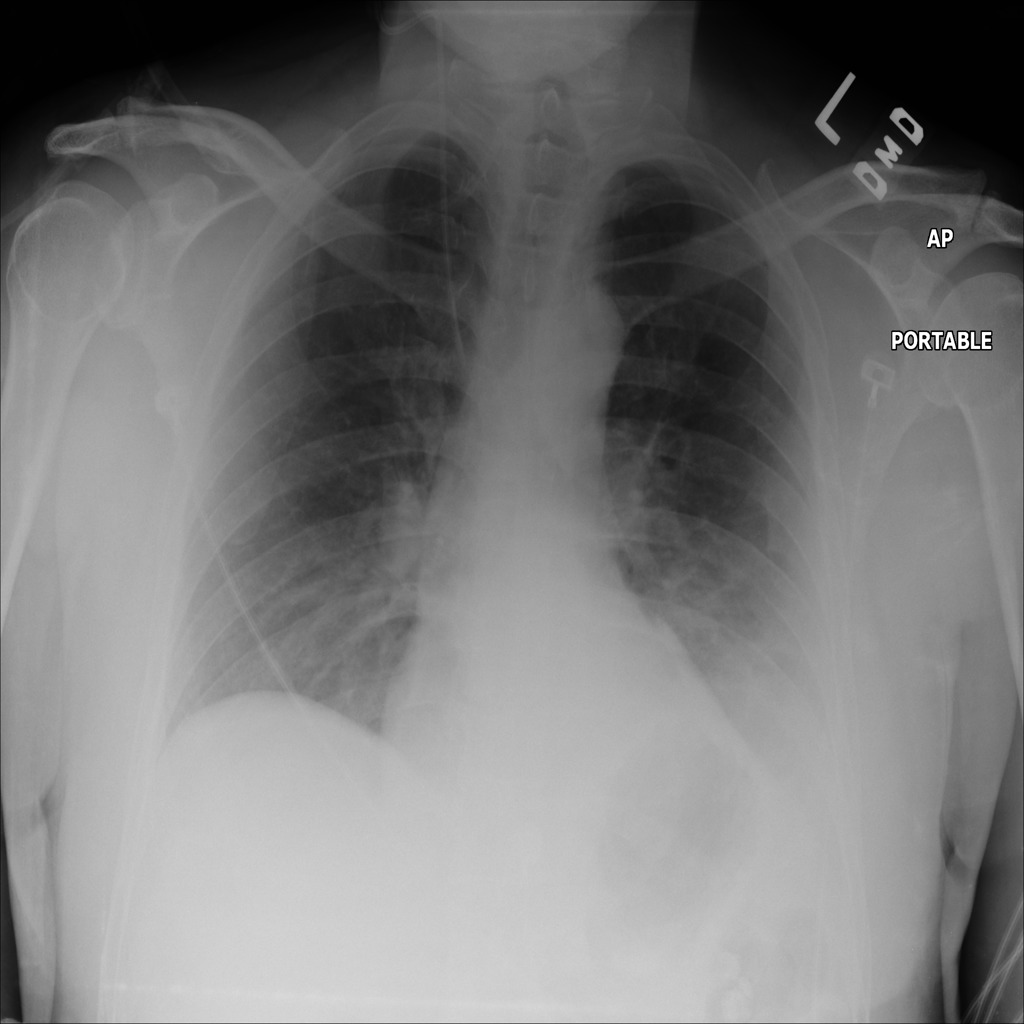

The label of image is 2


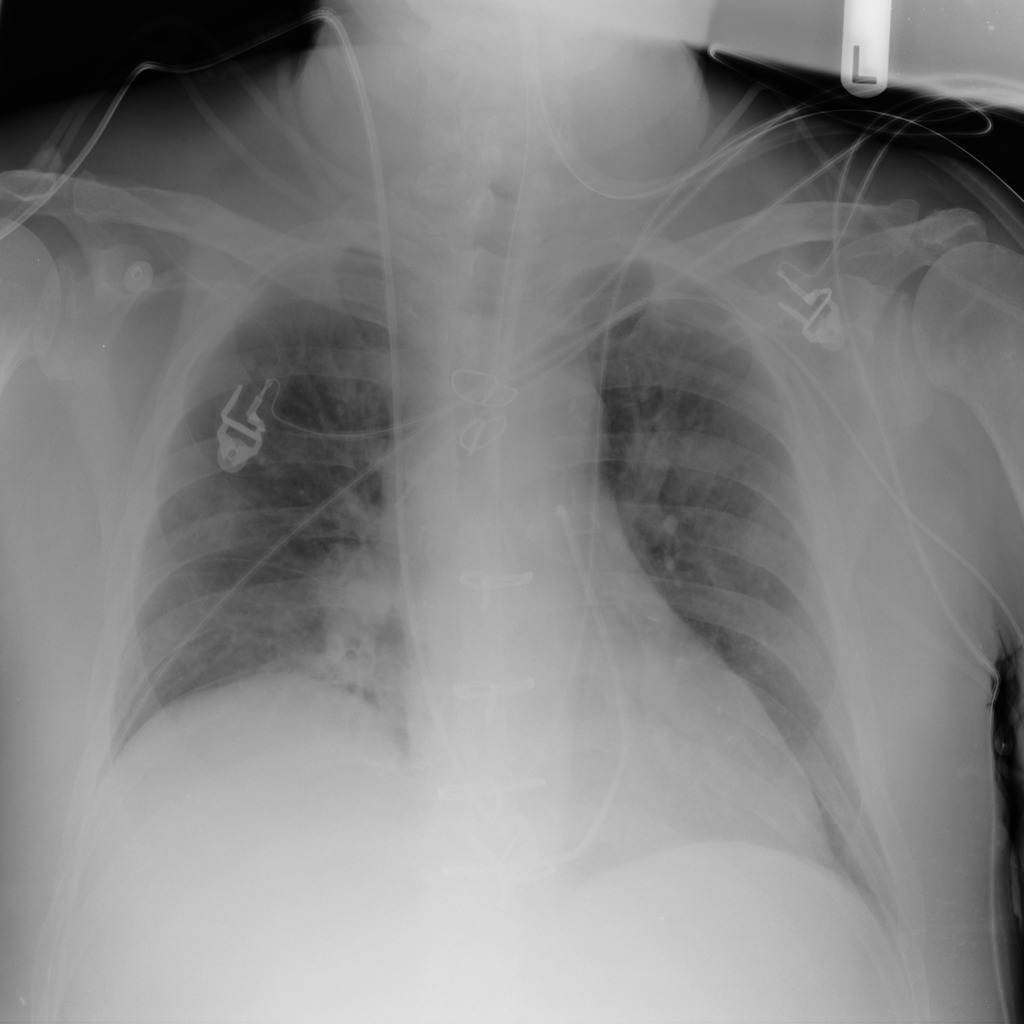

The label of image is 2


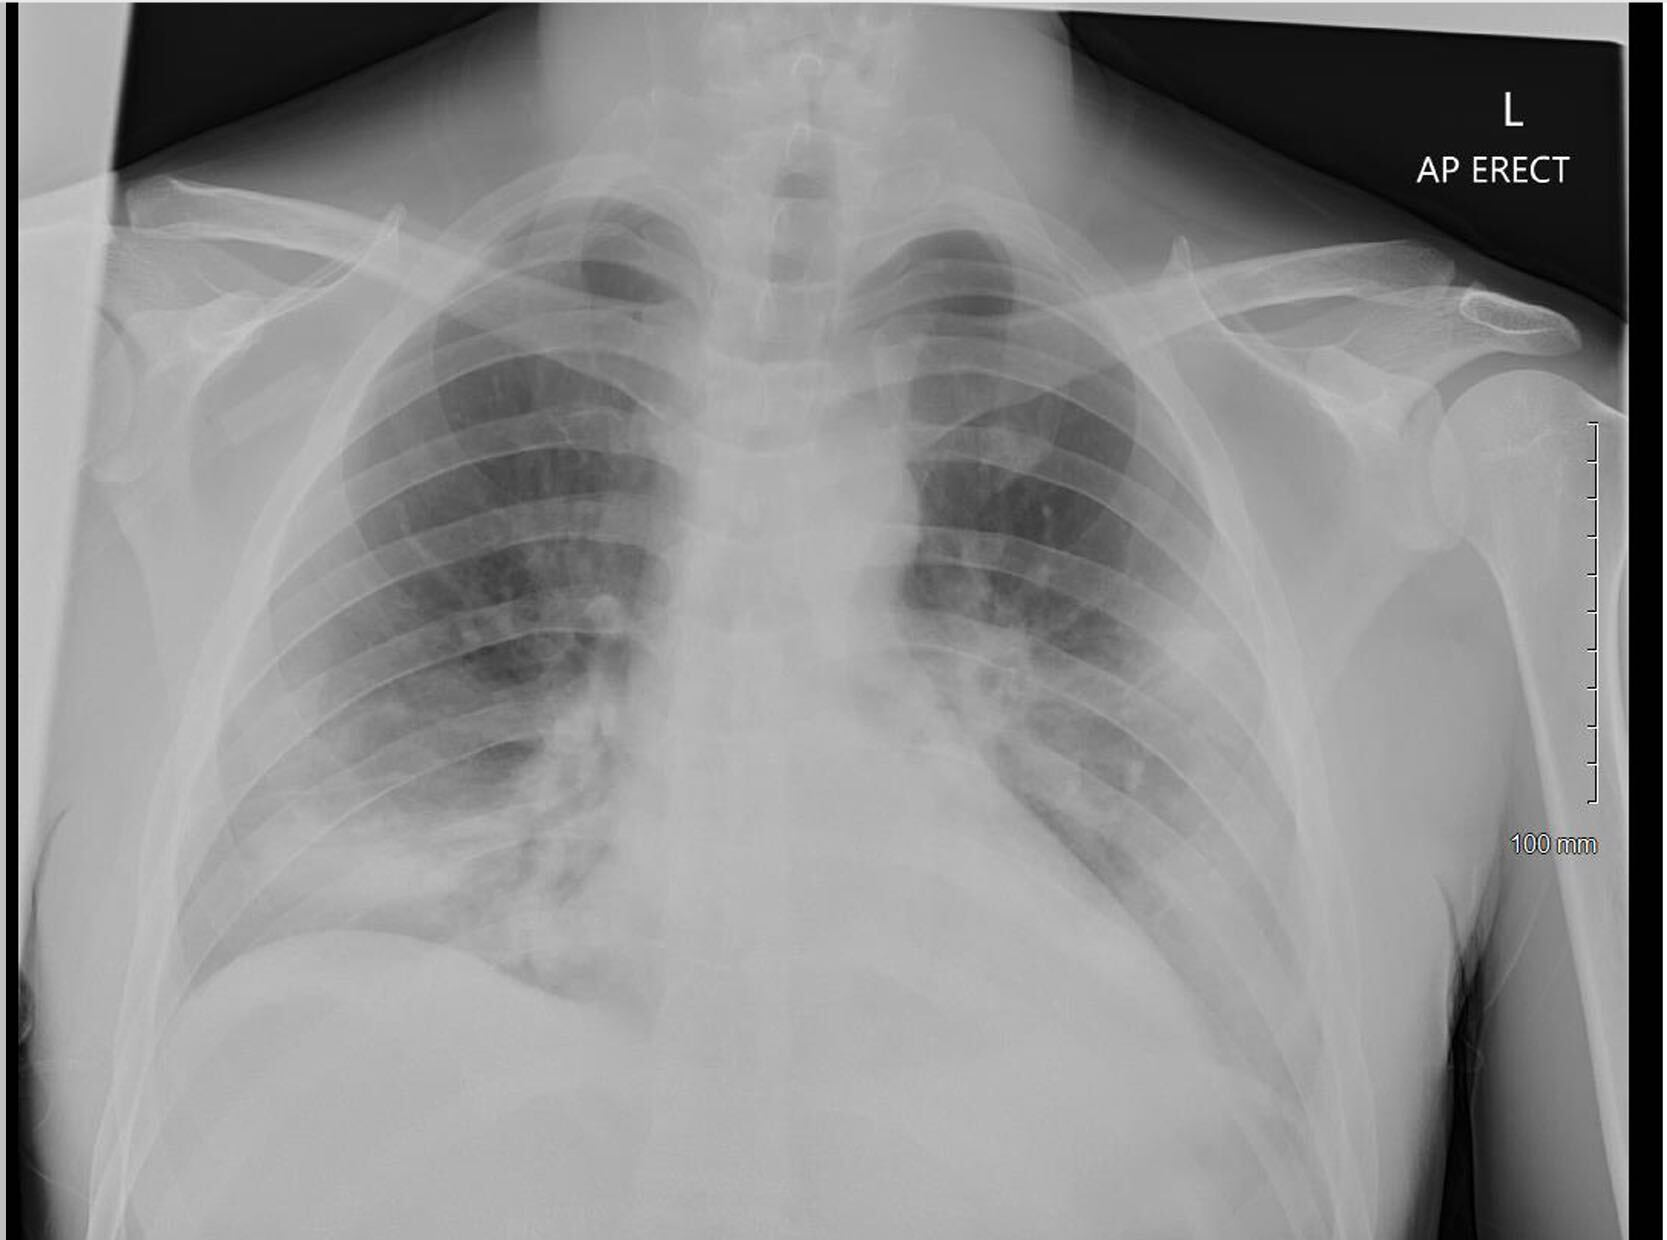

The label of image is 0


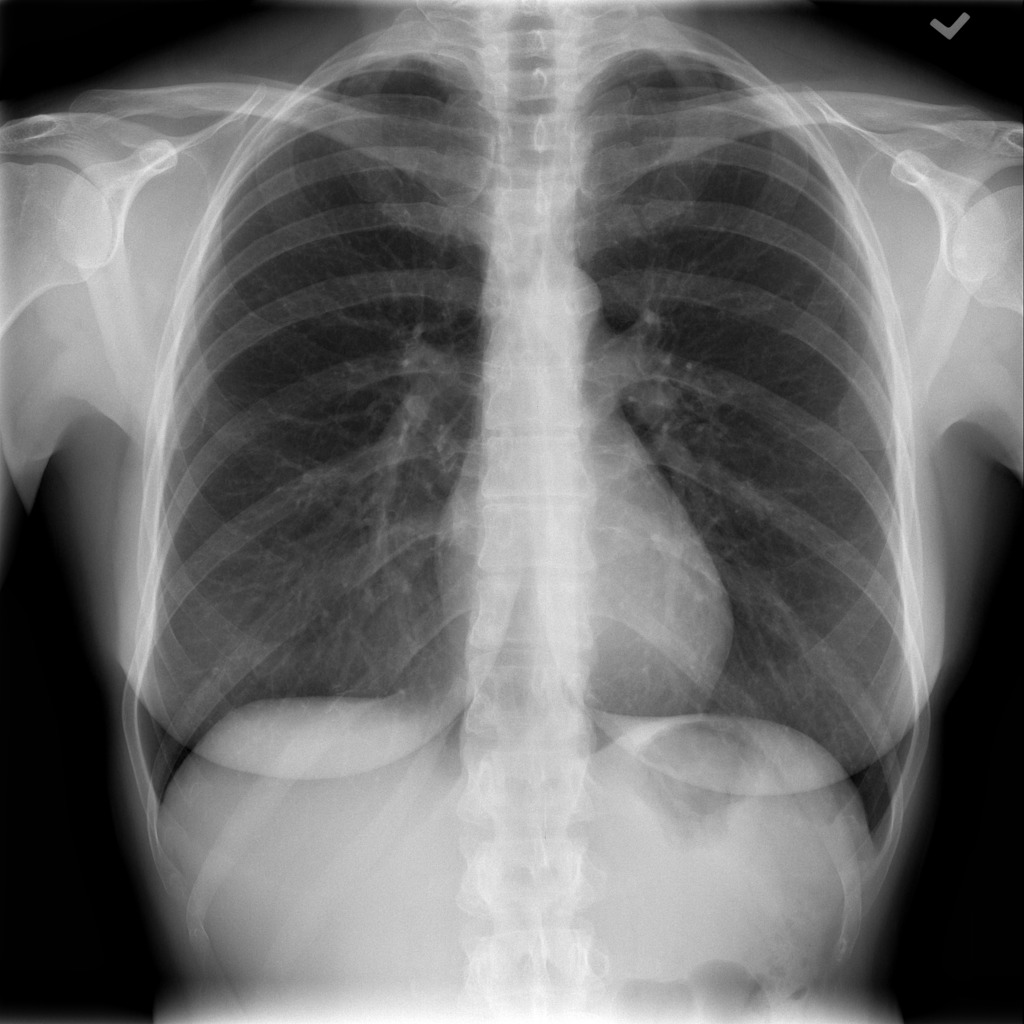

The label of image is 1


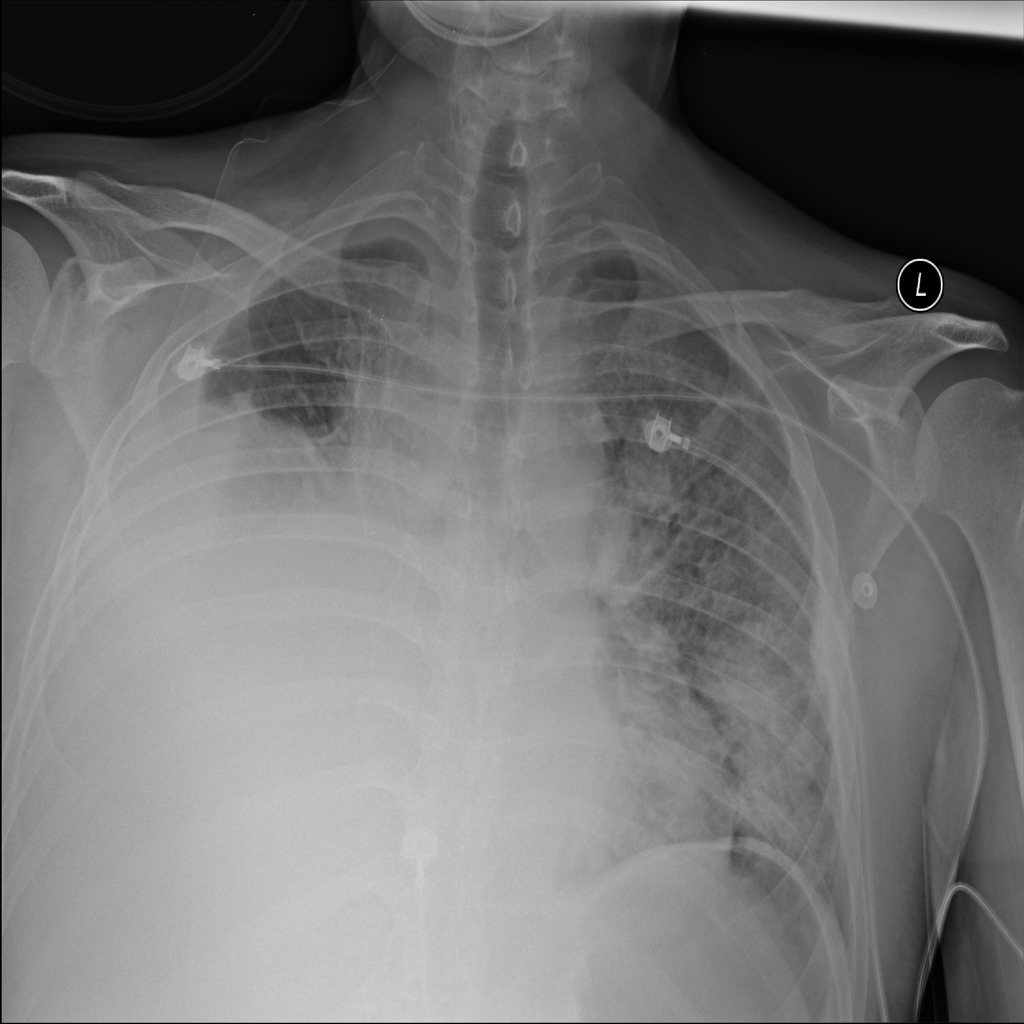

The label of image is 2


In [15]:
for image_features in parsed_image_dataset.take(5):
  image = image_features['image'].numpy()
  display.display(display.Image(data=image))
  label = image_features['label'].numpy()
  print('The label of image is', label)